In [2]:
%pip install pflacco
%pip install cma
%pip install ioh

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### First approach

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ioh import ProblemClass, get_problem
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


from pflacco.sampling import create_initial_sample

from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
from pflacco.local_optima_network_features import compute_local_optima_network, calculate_lon_features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pflacco.sampling import create_initial_sample
from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
import cma
from pflacco.classical_ela_features import (

    calculate_dispersion,

    calculate_ela_distribution,

    calculate_ela_level,

    calculate_ela_meta,

    calculate_information_content,

    calculate_nbc,

)

from pflacco.sampling import create_initial_sample


In [ ]:

def objective_function(x):
    return x[0]**2 - x[1]**2

dim = 2

X = create_initial_sample(dim, sample_type = 'lhs')
y = X.apply(lambda x: objective_function(x), axis = 1)

ela_distr = calculate_ela_distribution(X, y)
print(ela_distr)

fdc = calculate_fitness_distance_correlation(X, y)
print(fdc)

{'ela_distr.skewness': 0.03650378906807865, 'ela_distr.kurtosis': -0.659542874273646, 'ela_distr.number_of_peaks': 1, 'ela_distr.costs_runtime': 0.038004}
{'fitness_distance.fd_correlation': 0.5134362744519253, 'fitness_distance.fd_cov': 0.003781256467109486, 'fitness_distance.distance_mean': 0.14880355374039905, 'fitness_distance.distance_std': 0.09692414072232595, 'fitness_distance.fitness_mean': -0.7369221193345303, 'fitness_distance.fitness_std': 0.07598320823951793, 'fitness_distance.costs_runtime': 0.025786}


In [ ]:
bbob_functions = {
    1: cma.bbobbenchmarks.F1,
    2: cma.bbobbenchmarks.F2,
    3: cma.bbobbenchmarks.F3,
    4: cma.bbobbenchmarks.F4,
    5: cma.bbobbenchmarks.F5,
}

dim = 2
samples = 100
num_of_samples = 1000

ela_data = []

for func_id, func_class in bbob_functions.items():
  for x in range(0,num_of_samples):
      func = func_class()

      x_samples = np.random.uniform(-5, 5, (samples, dim))
      y_samples = np.array([func(x) for x in x_samples])

      ela_distr = calculate_ela_distribution(x_samples, y_samples)
      ela_fdc = calculate_fitness_distance_correlation(x_samples, y_samples)
      ela_df_distr = pd.DataFrame([ela_distr])
      ela_df_fdc = pd.DataFrame([ela_fdc])
      ela_df = pd.concat([ela_df_distr, ela_df_fdc], axis=1, join='inner')
      ela_df['Function'] = f'F{func_id}'
      ela_data.append(ela_df)

KeyboardInterrupt: 

In [ ]:
ela_data_df = pd.concat(ela_data, ignore_index=True)

selected_features_1 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime', 'fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']
selected_features_2 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime']
selected_features_3 = ['fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']

ela_melted_1 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_1,
                               var_name='ELA Feature', value_name='Value')
ela_melted_2 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_2,
                               var_name='ELA Feature', value_name='Value')
ela_melted_3 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_3,
                               var_name='ELA Feature', value_name='Value')

In [ ]:

selected_features_1 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime', 'fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']
selected_features_2 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime']
selected_features_3 = ['fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']

ela_melted_1 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_1,
                               var_name='ELA Feature', value_name='Value')
ela_melted_2 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_2,
                               var_name='ELA Feature', value_name='Value')
ela_melted_3 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_3,
                               var_name='ELA Feature', value_name='Value')

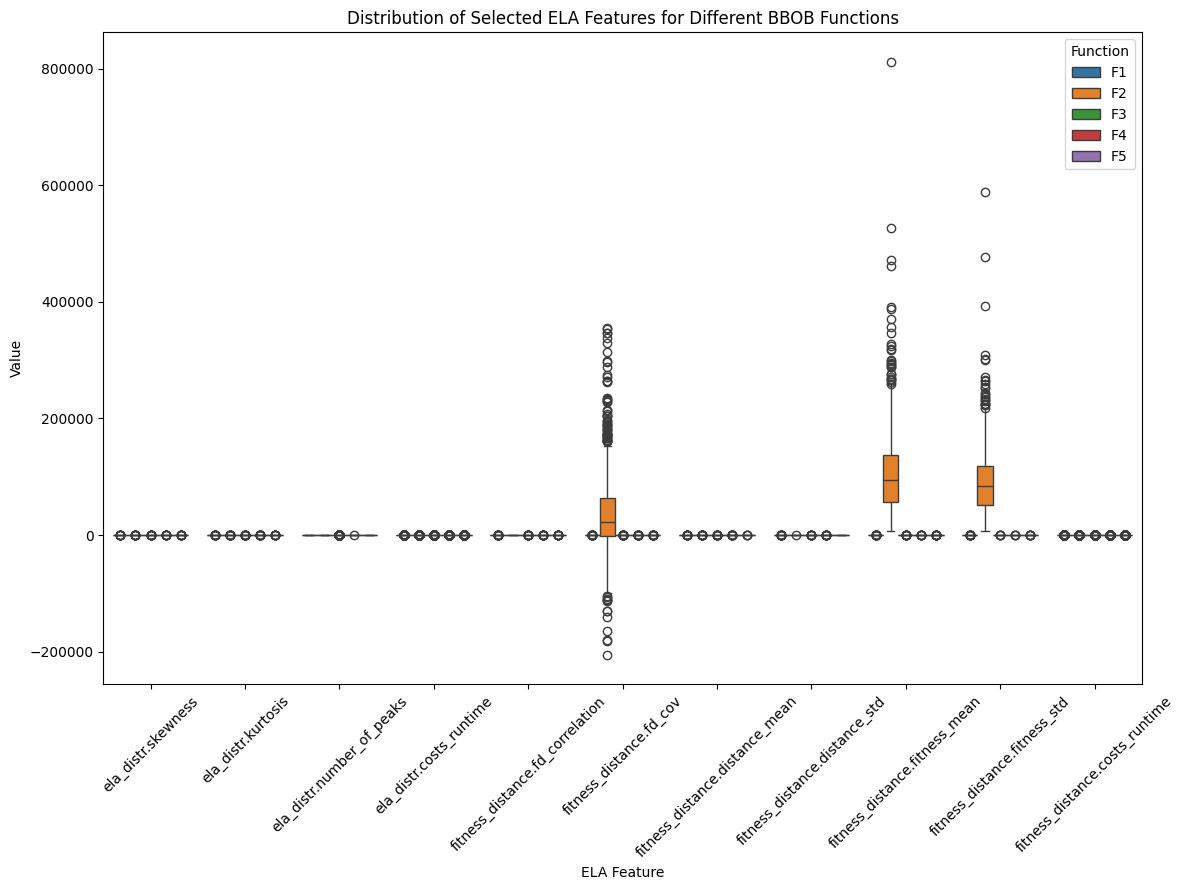

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_1, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

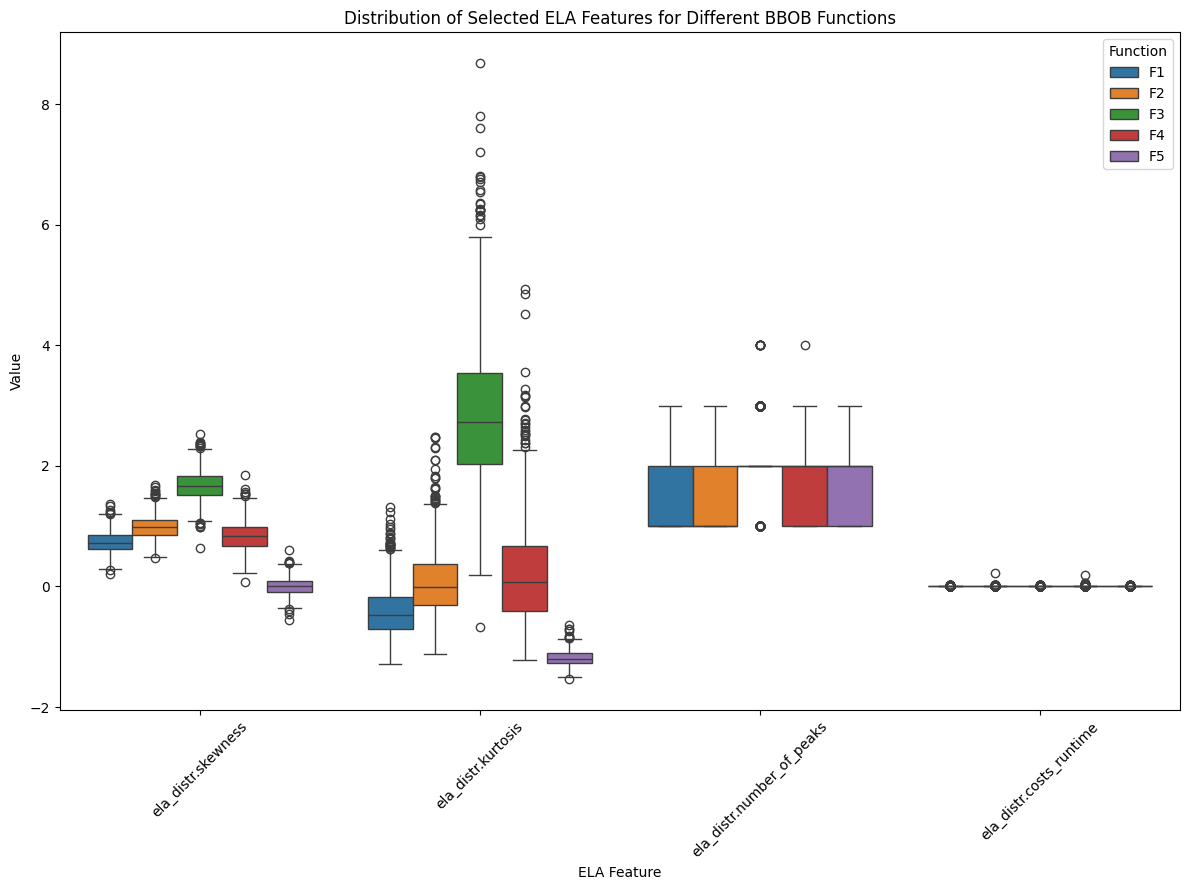

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_2, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_3, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

In [ ]:
for feature in selected_features_1:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=ela_data_df, x='Function', y=feature)
    plt.title(f"Distribution of {feature} for Different BBOB Functions")
    plt.xlabel("BBOB Function")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
sns.pairplot(ela_data_df, hue="Function", vars=selected_features_1, palette="Set2")
plt.suptitle("Pair Plot of Selected ELA Features", y=1.02)
plt.show()


### Second approach

In [ ]:
samples = 100
num_of_samples = 10
ela_data = []

lower_bound = -5
upper_bound = 5

fid_list = range(1, 25 + 1)
iid_list = range(1, 16 + 1)

for dim in range(2, 8):
    for func_id in range(1, 25):
        for iid in iid_list:

            problem = get_problem(func_id, iid, dim, ProblemClass.BBOB)


            for _ in range(num_of_samples):
                X = create_initial_sample(dim, lower_bound=-5, upper_bound=5)

                y = X.apply(lambda x: problem(x), axis=1)

                ela_distr = calculate_ela_distribution(X, y)
                ela_df_distr = pd.DataFrame([ela_distr])

                ela_fdc = calculate_fitness_distance_correlation(X, y)
                ela_df_fdc = pd.DataFrame([ela_fdc])

                ela_meta = calculate_ela_meta(X, y)
                ela_df_meta = pd.DataFrame([ela_meta])

                ela_level = calculate_ela_level(X, y)
                ela_df_level = pd.DataFrame([ela_level])

                nbc = calculate_nbc(X, y)
                ela_df_nbc = pd.DataFrame([nbc])

                disp = calculate_dispersion(X, y)
                ela_df_disp = pd.DataFrame([disp])

                ic = calculate_information_content(X, y, seed=100)
                ela_df_ic = pd.DataFrame([ic])

                ela_df = pd.concat([ela_df_distr, ela_df_fdc, ela_df_meta, ela_df_level, ela_df_nbc, ela_df_disp, ela_df_ic], axis=1, join='inner')
                ela_df['Function'] = f'F{func_id}'
                ela_df['Instance'] = iid
                ela_df['Dimension'] = dim
                ela_data.append(ela_df)

final_ela_data = pd.concat(ela_data, axis=0, ignore_index=True)

final_ela_data.to_csv("ela_results.csv", index=False)

KeyboardInterrupt: 

In [3]:
final_ela_data = pd.read_csv("ela_final_results.csv")

In [4]:
final_ela_data.head()

,ela_distr.skewness,ela_distr.kurtosis,ela_distr.number_of_peaks,ela_distr.costs_runtime,fitness_distance.fd_correlation,fitness_distance.fd_cov,fitness_distance.distance_mean,fitness_distance.distance_std,fitness_distance.fitness_mean,fitness_distance.fitness_std,...,disp.costs_runtime,ic.h_max,ic.eps_s,ic.eps_max,ic.eps_ratio,ic.m0,ic.costs_runtime,Function,Instance,Dimension
0,0.308304,-0.857005,2,0.016,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.015,0.723599,1.086086,1.885344,0.705706,0.367347,0.110,F1,1,2
1,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.094,F1,1,2
2,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.093,F1,1,2
3,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.093,F1,1,2
4,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.110,F1,1,2


In [5]:
list_of_dimensions = []

for x in range(2,8):
    df = final_ela_data[final_ela_data["Dimension"] == x]
    list_of_dimensions.append(df)

### Classification

In [6]:
df = list_of_dimensions[0]
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
X = df.drop(columns = ['Function','Dimension','Instance'], axis=1)
y = df['Function']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')


In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 1.0


In [8]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 1.0


In [ ]:
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(X_train, y_train)

# y_pred_svm = svm_classifier.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print(f"SVM Accuracy: {accuracy_svm}")

### Classification with PCA

In [9]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy without PCA: {accuracy_pca}")

Random Forest Accuracy without PCA: 0.9811827956989247


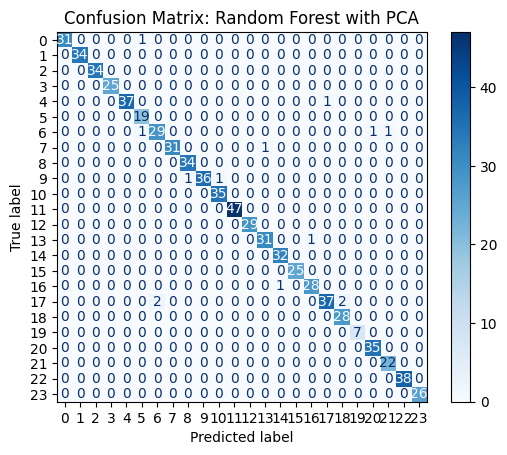

In [10]:
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest with PCA")
plt.show()

In [11]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9838709677419355


In [12]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9865591397849462


In [13]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9758064516129032


In [14]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9623655913978495


In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.8548387096774194


In [16]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.5994623655913979


In [17]:
list_of_acc = []

for x in range(2,20):
    pca = PCA(n_components=x)
    X_pca = pca.fit_transform(X_scaled)

    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier_pca.fit(X_train_pca, y_train)

    y_pred_pca = rf_classifier_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print(accuracy_pca)
    list_of_acc.append(accuracy_pca)


0.8548387096774194
0.9623655913978495
0.9744623655913979
0.9865591397849462
0.9852150537634409
0.9825268817204301
0.9838709677419355
0.978494623655914
0.9811827956989247
0.9825268817204301
0.9838709677419355
0.9811827956989247
0.9865591397849462
0.9771505376344086
0.9838709677419355
0.989247311827957
0.9838709677419355
0.9811827956989247


C:\Users\justy\AppData\Local\Temp\ipykernel_10700\3177410548.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


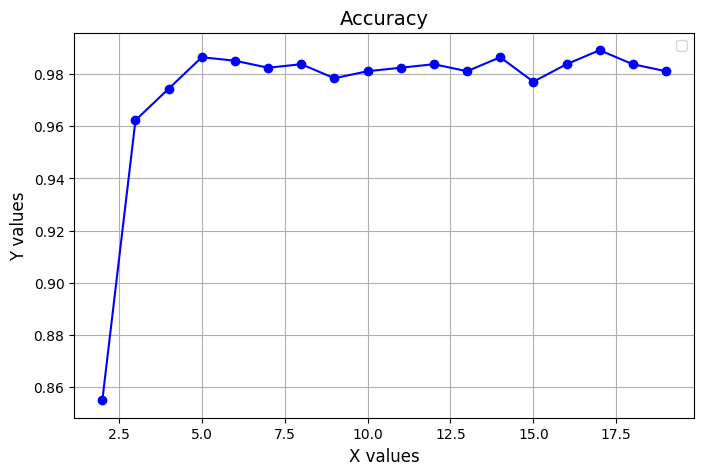

In [18]:
import matplotlib.pyplot as plt

x = list(range(2, 20))

plt.figure(figsize=(8, 5))
plt.plot(x, list_of_acc, marker='o', linestyle='-', color='b')

# Add labels, title, and legend
plt.title("Accuracy", fontsize=14)
plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.legend()
plt.grid(True)

### Todo 04.12

In [19]:
X_subset = final_ela_data[selected_features_1]
y = final_ela_data['Function']
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

NameError: name 'selected_features_1' is not defined

In [20]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled_train)

plt.figure(figsize=(10, 6))
for func_id in np.unique(y):
    indices = np.where(y == func_id)
    plt.scatter(X_pca_2d[indices, 0], X_pca_2d[indices, 1], label=f'Function {func_id}', alpha=0.6)
plt.title("PCA 2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'X_scaled_train' is not defined

In [ ]:
def train_and_evaluate(X_subset, y, classifier_name="Random Forest"):
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    if classifier_name == "Random Forest":
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    elif classifier_name == "KNN":
        classifier = KNeighborsClassifier(n_neighbors=5)
    elif classifier_name == "SVM":
        classifier = SVC(kernel='rbf', random_state=42)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{classifier_name} Accuracy with selected features: {accuracy}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {classifier_name}")
    plt.show()

Random Forest Accuracy with selected features: 1.0


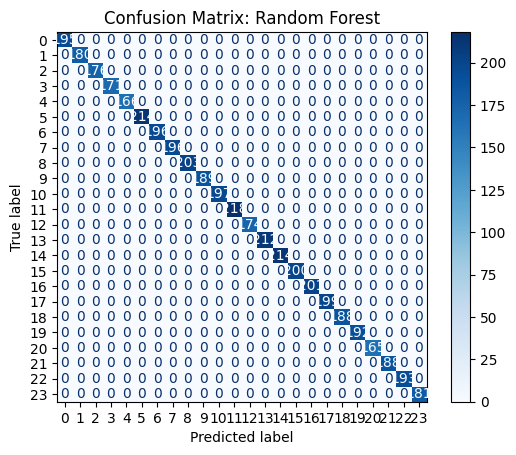

In [ ]:
train_and_evaluate(final_ela_data[selected_features_1], final_ela_data['Function'], "Random Forest")

Random Forest Accuracy with selected features: 0.99609375


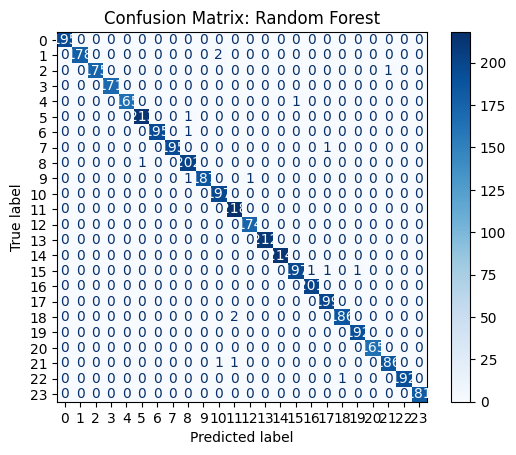

In [ ]:
train_and_evaluate(final_ela_data[selected_features_2], final_ela_data['Function'], "Random Forest")

Random Forest Accuracy with selected features: 1.0


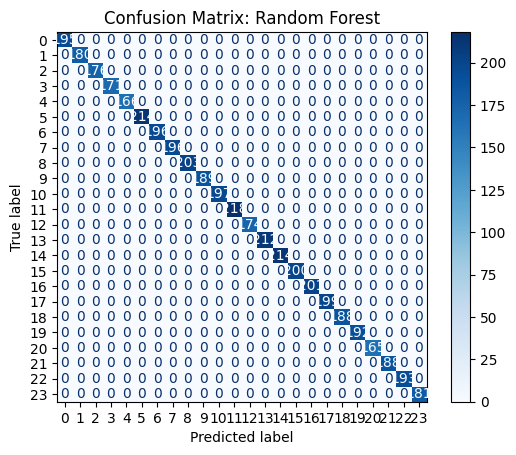

In [ ]:
train_and_evaluate(final_ela_data[selected_features_3], final_ela_data['Function'], "Random Forest")

KNN Accuracy with selected features: 1.0


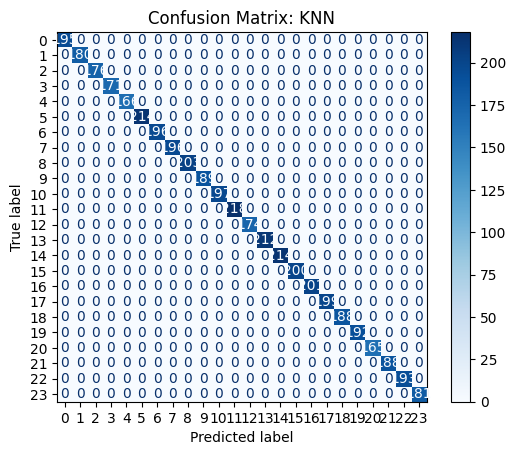

In [ ]:
train_and_evaluate(final_ela_data[selected_features_1], final_ela_data['Function'], "KNN")

SVM Accuracy with selected features: 0.3094618055555556


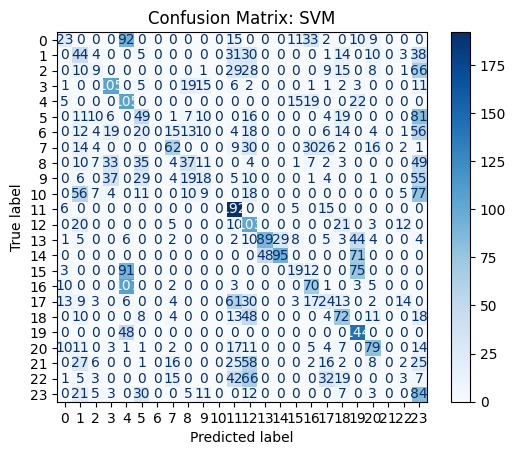

In [ ]:
train_and_evaluate(final_ela_data[selected_features_2], final_ela_data['Function'], "SVM")

## Task 2

In [ ]:
function_id_to_class = {
    "F1": "1",
    "F2": "1",
    "F3": "1",
    "F4": "1",
    "F5": "1",
    "F6": "2",
    "F7": "2",
    "F8": "2",
    "F9": "2",
    "F10": "3",
    "F11": "3",
    "F12": "3",
    "F13": "3",
    "F14": "3",
    "F15": "4",
    "F16": "4",
    "F17": "4",
    "F18": "4",
    "F19": "4",
    "F20": "5",
    "F21": "5",
    "F22": "5",
    "F23": "5",
    "F24": "5",
}

In [ ]:
final_ela = final_ela_data
final_ela['Function_Class'] = final_ela['Function'].map(function_id_to_class).fillna('Unknown Class')

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_encoder = LabelEncoder()
y_class = class_encoder.fit_transform(final_ela['Function_Class'])

In [ ]:
X_subset = final_ela[selected_features_1]
y = final_ela['Function_Class']
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

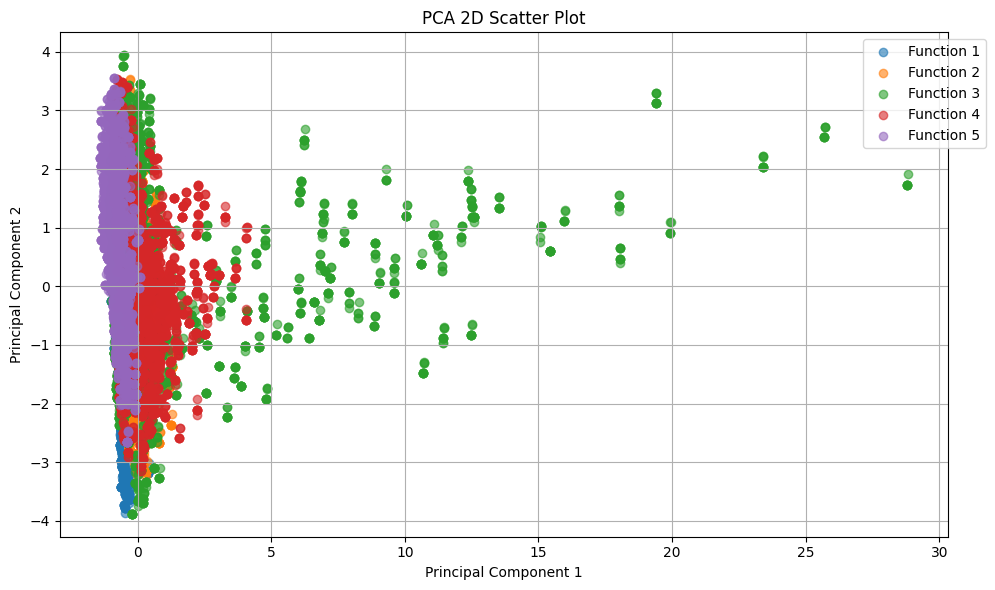

In [ ]:
pca_2d = PCA(n_components=4)
X_pca_2d = pca_2d.fit_transform(X_scaled_train)
X_pca_test = pca_2d.transform(X_scaled_test)

plt.figure(figsize=(10, 6))
for func_id in np.unique(y_train):
    indices = np.where(y_train == func_id)
    plt.scatter(X_pca_2d[indices, 0], X_pca_2d[indices, 1], label=f'Function {func_id}', alpha=0.6)
plt.title("PCA 2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, classifier_name="Random Forest"):
    if classifier_name == "Random Forest":
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    elif classifier_name == "KNN":
        classifier = KNeighborsClassifier(n_neighbors=5)
    elif classifier_name == "SVM":
        classifier = SVC(kernel='rbf', random_state=42)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{classifier_name} Accuracy with selected features: {accuracy}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {classifier_name}")
    plt.show()

In [ ]:
pc1_contributions = abs(pca_2d.components_[0])  
top_4_indices = pc1_contributions.argsort()[-4:][::-1]  
top_4_columns = X_subset.columns[top_4_indices]

print("Wybrane kolumny:", top_4_columns)

Wybrane kolumny: Index(['fitness_distance.fitness_std', 'fitness_distance.fitness_mean',
       'fitness_distance.fd_cov', 'ela_distr.kurtosis'],
      dtype='object')


In [ ]:
X_pandas = pd.DataFrame(X_pca_test, columns=X_subset.columns)
X_pandas = X_pandas[top_4_columns]

Random Forest Accuracy with selected features: 0.9665798611111112


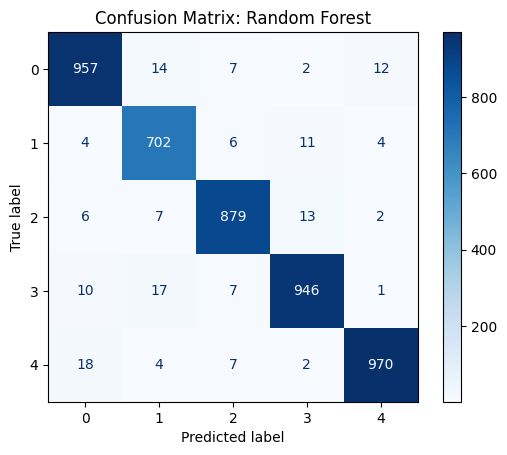

In [ ]:
train_and_evaluate(X_pca_2d, X_pca_test, y_train.to_numpy(), y_test.to_numpy(), "Random Forest")

### BBOB <-> GNBG mapping Task

Example

In [21]:
import numpy as np
from pflacco.sampling import create_initial_sample
from pflacco.classical_ela_features import calculate_ela_distribution

class GNBGWrapper:
    def __init__(self, gnbg) -> None:
        """
        Wraps the GNBG benchmark for compatibility with ELA calculations.
        
        :param gnbg: Instance of GNBG benchmark (assumed to have a 'fitness' method)
        """
        self.gnbg = gnbg

    def __call__(self, x: np.ndarray) -> float:
        """
        Evaluates the GNBG fitness function for a given input.
        
        :param x: Input array of shape (n_samples, n_features)
        :return: Fitness value(s)
        """
        return self.gnbg.fitness(np.array([x]))[0]

dim = 2
X = create_initial_sample(dim, sample_type='lhs')

def example_gnbg_fitness(x: np.ndarray) -> np.ndarray:
    """
    Example GNBG-like fitness function (to be replaced with actual GNBG functions).
    """
    return np.sum(x**2, axis=1)

class ExampleGNBG:
    def fitness(self, x: np.ndarray) -> np.ndarray:
        return example_gnbg_fitness(x)

gnbg_wrapper = GNBGWrapper(ExampleGNBG())

y = X.apply(lambda row: gnbg_wrapper(row.values), axis=1)

ela_distr = calculate_ela_distribution(X, y)

print("ELA Distribution Features:")
print(ela_distr)


ELA Distribution Features:
{'ela_distr.skewness': 0.44073427543276195, 'ela_distr.kurtosis': -0.7622281954433667, 'ela_distr.number_of_peaks': 1, 'ela_distr.costs_runtime': 0.015}


Mapping

In [5]:
import numpy as np
import pflacco
from pflacco.sampling import create_initial_sample
from pflacco.classical_ela_features import calculate_ela_distribution

def compute_gradient(f, x, epsilon=1e-6):
    """
    Calculate the approximate gradient of function f at point x
    using the central difference method.
    """
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_pos = x.copy()
        x_neg = x.copy()
        x_pos[i] += epsilon
        x_neg[i] -= epsilon
        grad[i] = (f(x_pos) - f(x_neg)) / (2 * epsilon)
    return grad

def analyze_function(f, x_init):
    """
    Function to analyze the general characteristics of function f
    (e.g. modality, ill-conditioning, separability).
    """
    gradient = compute_gradient(f, x_init)
    
    gradient_norm = np.linalg.norm(gradient)
    if gradient_norm < 1e-3:
        modality = "unimodal"
    else:
        modality = "multimodal"  # The function might have multiple minima
    

    # Checking for ill-conditioning (very small gradients)
    if np.any(np.abs(gradient) < 1e-6):
        conditioning = "ill-conditioned"
    else:
        conditioning = "well-conditioned"

    # Separability (checking how values change when only one variable changes)
    separability = "separable" if np.all(np.abs(gradient) > 1e-3) else "non-separable"

    return modality, conditioning, separability, gradient

def gnbg_mapping(f, x_init):
    """
    Map function f to GNBG based on the characteristics of the function.
    """
    modality, conditioning, separability, gradient = analyze_function(f, x_init)
    
    # Selecting the appropriate approach based on function characteristics
    if modality == "unimodal" and conditioning == "well-conditioned":
        # print("Using classical gradient for unimodal and well-conditioned function.")
        return gradient
    elif modality == "multimodal" and conditioning == "ill-conditioned":
        # print("Using advanced gradient for multimodal and ill-conditioned function.")
        return gradient * 1.5
    elif separability == "separable":
        # print("Using gradient for separable function.")
        return gradient
    else:
        # print("Using advanced gradient with adaptation.")
        return gradient * 0.5


def example_function(x):
    return np.sum(x**2)


# Initializing the starting point
x_init = np.random.randn(10)
# Mapping function to GNBG
gradient = gnbg_mapping(example_function, x_init)
print("Mapped gradient:", gradient)
# Creating a GNBG wrapper to call the objective function within PFLacco
class GNBGWrapper:
    def __init__(self, gradient_func):
        self.gradient_func = gradient_func
    def __call__(self, x: np.ndarray) -> float:
        gradient = self.gradient_func(x)
        return np.sum(gradient**2)
samples = 100
num_of_samples = 10
ela_data = []
lower_bound = -100
upper_bound = 100
fid_list = range(1, 25 + 1)
iid_list = range(1, 16 + 1)
for dim in range(2, 8): #8
    for func_id in range(1, 25):
        for iid in iid_list:
            problem = get_problem(func_id, iid, dim, ProblemClass.BBOB)
            for _ in range(num_of_samples):
                X = create_initial_sample(dim, sample_type='lhs')
                try:
                    gnbg_wrapper = GNBGWrapper(lambda x: gnbg_mapping(problem, x))
                    y = X.apply(lambda x: gnbg_wrapper(x), axis=1)
                
                    ela_distr = calculate_ela_distribution(X, y)
                    ela_df_distr = pd.DataFrame([ela_distr])
                    # ela_fdc = calculate_fitness_distance_correlation(X, y)
                    # ela_df_fdc = pd.DataFrame([ela_fdc])
                    # ela_meta = calculate_ela_meta(X, y)
                    # ela_df_meta = pd.DataFrame([ela_meta])
                    # ela_level = calculate_ela_level(X, y)
                    # ela_df_level = pd.DataFrame([ela_level])
                    # nbc = calculate_nbc(X, y)
                    # ela_df_nbc = pd.DataFrame([nbc])
                    # disp = calculate_dispersion(X, y)
                    # ela_df_disp = pd.DataFrame([disp])
                    # ic = calculate_information_content(X, y, seed=100)
                    # ela_df_ic = pd.DataFrame([ic])
                    ela_df = pd.concat([ela_df_distr], axis=1, join='inner') #, ela_df_fdc, ela_df_meta, ela_df_nbc, ela_df_disp, ela_df_ic
                    ela_df['Function'] = f'F{func_id}'
                    ela_df['Instance'] = iid
                    ela_df['Dimension'] = dim
                    ela_data.append(ela_df)
                except:
                    print(problem)
final_ela_data = pd.concat(ela_data, axis=0, ignore_index=True)
final_ela_data.to_csv("ela_results_gnbg.csv", index=False)
                # print("\nObjective function values for the samples:")
                # print(y)
                # print("\nELA distribution:")
                # print(ela_distr)

Mapped gradient: [-0.77402407  4.22403087 -1.28715168 -2.02994386  6.10963411 -2.30505802
 -1.20920275 -3.87192517 -0.47082393 -1.9816831 ]


C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=2)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=2)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=3)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=3)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=4)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=4)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=5)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=14 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=14 dim=5)>
<RealSingleObjectiveProb

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=15 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=16 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=16 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=16 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=16 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=16 dim=5)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=16 dim=5)>
<RealSingleObjectiveProb

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>


C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=3 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=3 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=3 dim=6)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=4 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=5 dim=6)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=1 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=2 dim=7)>
<RealSingleObjectiveProblem 7. StepEllip

C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:692: RuntimeWarning: invalid value encountered in scalar divide
  y_skewness = np.sqrt(n) * (y_skewness.pow(3)).sum() / ((y_skewness.pow(2)).sum() ** (3/2))
C:\Users\justy\AppData\Roaming\Python\Python311\site-packages\pflacco\classical_ela_features.py:700: RuntimeWarning: invalid value encountered in scalar divide
  r = n * (y_kurtosis.pow(4).sum()) / (y_kurtosis.pow(2).sum() ** 2)


<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=12 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProblem 7. StepEllipsoid (iid=13 dim=7)>
<RealSingleObjectiveProb